In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Tuple, List, Any

In [9]:
def plot_result_regression(full_X: torch.Tensor, full_y: torch.Tensor,
                           test_X: torch.Tensor, test_y: torch.Tensor):
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))

    ax.scatter(full_X, full_y, label='true')
    ax.scatter(test_X, test_y, label='pred')

    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    
def read_cuda_mlp_test_results(task_name: str) -> Tuple[torch.Tensor, torch.Tensor]:
    test_features_pd = pd.read_csv(f'test_results/{task_name}_test_features.csv')
    test_labels_pd = pd.read_csv(f'test_results/{task_name}_test_labels.csv')
    
    return (torch.tensor(test_features_pd.values), torch.tensor(test_labels_pd.values))

In [14]:
dataset_size = 10000

X = torch.linspace(-2.0, 2.0, dataset_size)
cos_y = torch.cos(2.0 * torch.pi * X)
sin_y = X * torch.sin(2.0 * torch.pi * X)
polynom_y = 5 * X * X * X + X * X + 5

In [19]:
cos_test_features, cos_test_labels = read_cuda_mlp_test_results('cos_2pi')
sin_test_features, sin_test_labels = read_cuda_mlp_test_results('x_sin_2pi')
polynom_test_features, polynom_test_labels = read_cuda_mlp_test_results('polynom')

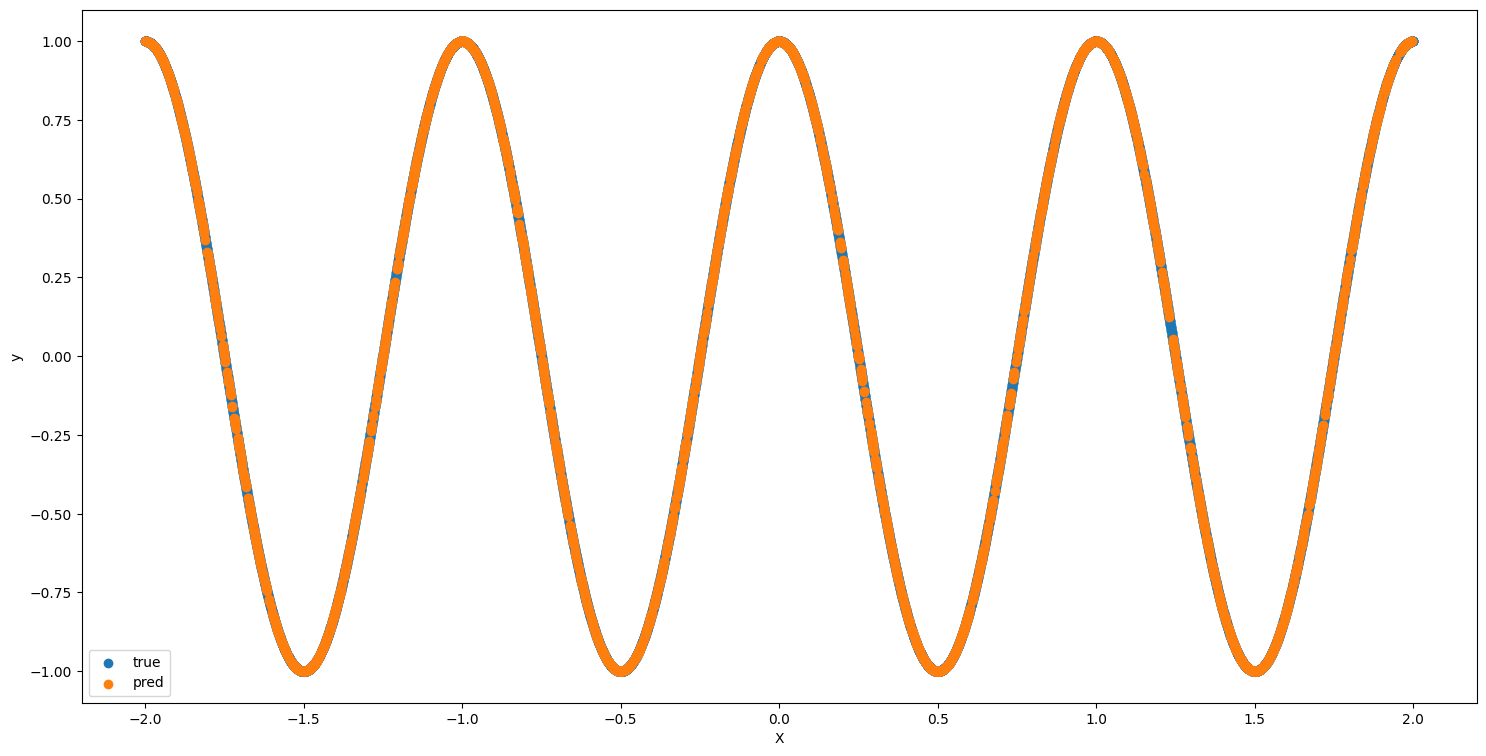

In [16]:
plot_result_regression(X, cos_y, cos_test_features, cos_test_labels)

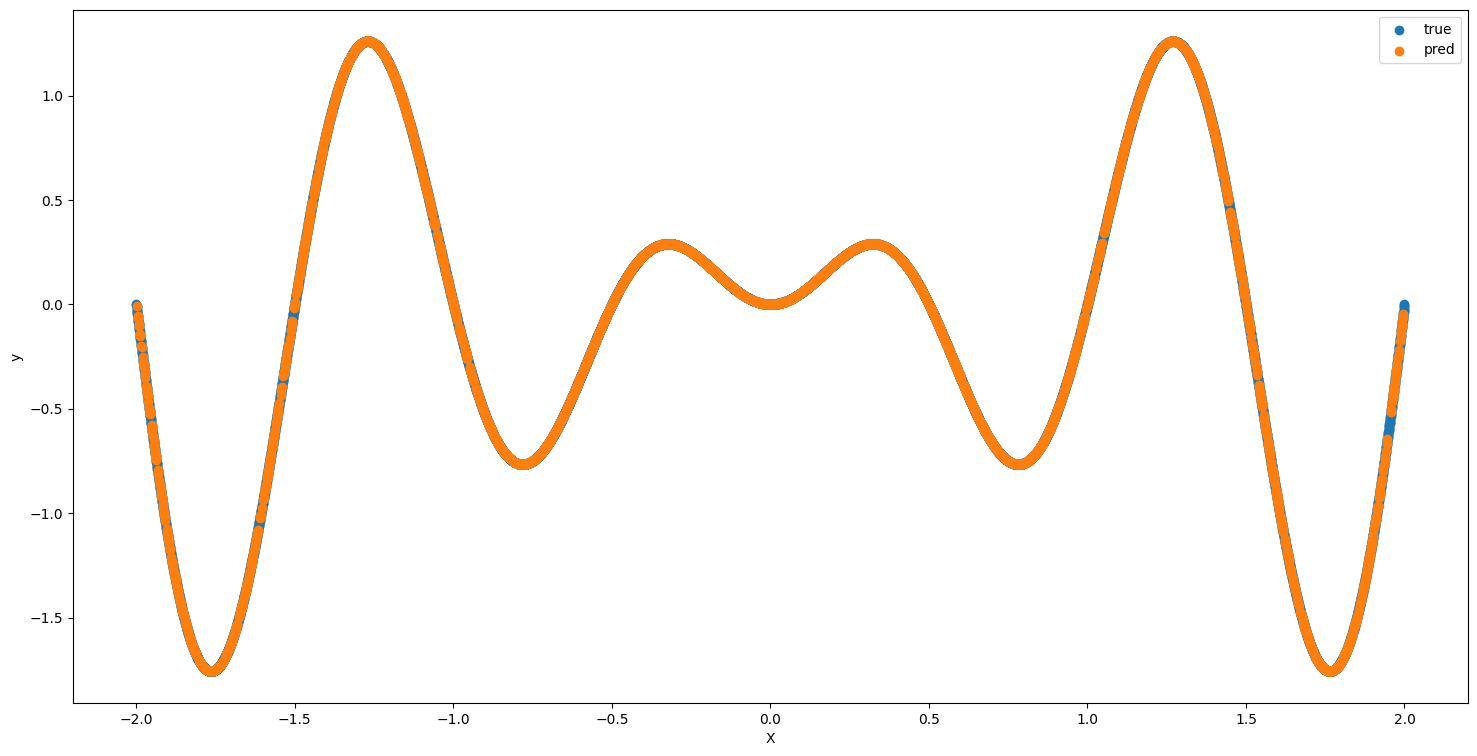

In [17]:
plot_result_regression(X, sin_y, sin_test_features, sin_test_labels)

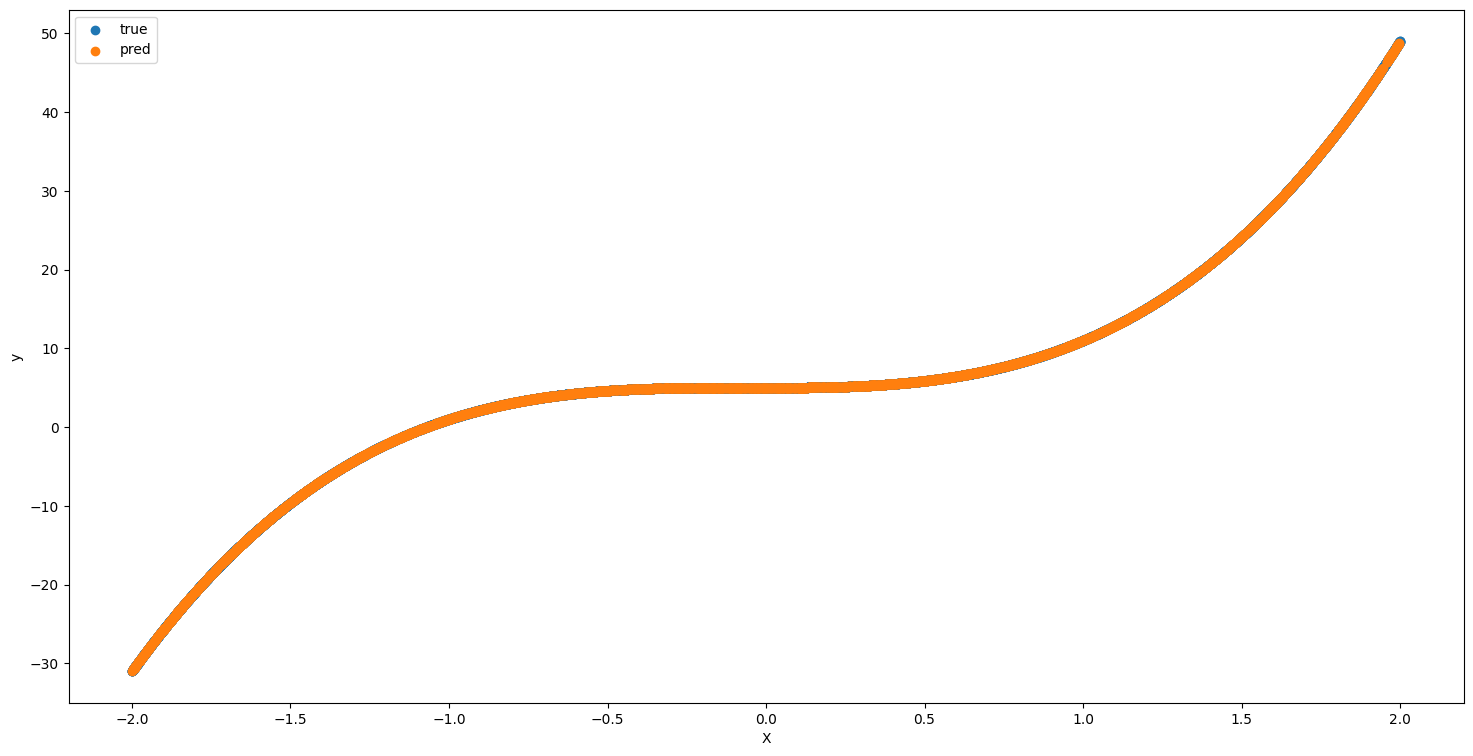

In [20]:
plot_result_regression(X, polynom_y, polynom_test_features, polynom_test_labels)